# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
pip install plotly==4.5.2

     |████████████████████████████████| 7.1MB 4.6MB/s 
  Found existing installation: plotly 4.14.3
    Uninstalling plotly-4.14.3:
      Successfully uninstalled plotly-4.14.3


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from datetime import datetime, timedelta

In [ ]:
pip install iso3166

In [ ]:
from iso3166 import countries

### Notebook Presentation

In [ ]:
pd.options.display.float_format = "{:,.2f}".format

### Load the Data

In [ ]:
df_data = pd.read_csv("mission_launches.csv")

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(f"{df_data.shape[0]} rows and {df_data.shape[1]} columns")

964 rows and 9 columns


In [ ]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [ ]:
df_data.sample(n=5)

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
3438,3438,3438,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sat Aug 29, 1970 08:30 UTC",Voskhod | Cosmos 360,StatusRetired,NaN,Success
1144,1144,1144,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Apr 19, 2001 18:40 UTC",Space Shuttle Endeavour | STS-100,StatusRetired,450.0,Success
790,790,790,VKS RF,"Site 16/2, Plesetsk Cosmodrome, Russia","Tue Dec 02, 2008 04:59 UTC",Molniya-M /Block 2BL | Cosmos 2446,StatusRetired,NaN,Success
1970,1970,1970,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Tue Dec 15, 1987 13:30 UTC",Cosmos-3M (11K65M) | Cosmos 1902,StatusRetired,NaN,Success
1307,1307,1307,ILS,"SLC-36A, Cape Canaveral AFS, Florida, USA","Thu Jun 18, 1998 22:48 UTC",Atlas IIAS | Intelsat 805,StatusRetired,NaN,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
print(f"Any NaN values? {df_data.isna().values.any()}")

Any NaN values? True


In [ ]:
print(f"{df_data.isna().values.sum()} cells contain NaN values")

3360 cells contain NaN values


In [ ]:
df_data[df_data.columns[df_data.isna().any()]]

,Price
0,50.0
1,29.75
2,NaN
3,65.0
4,145.0
...,...
4319,NaN
4320,NaN
4321,NaN
4322,NaN


In [ ]:
print(f"There are {len(df_data[df_data.isna().any(axis=1)])} rows with NaN values")

There are 3360 rows with NaN values


In [ ]:
df_data.dropna(inplace=True)

In [ ]:
print(f"Any NaN values? {df_data.isna().values.any()}")

Any NaN values? False


In [ ]:
print(f"Any duplicates? {df_data.duplicated().values.any()}")

Any duplicates? False


In [ ]:
print(f"{df_data.shape[0]} rows and {df_data.shape[1]} columns")

964 rows and 9 columns


In [ ]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


## Descriptive Statistics

In [ ]:
df_data.describe()

,Unnamed: 0,Unnamed: 0.1
count,964.00,964.00
mean,858.49,858.49
std,784.21,784.21
min,0.00,0.00
25%,324.75,324.75
50%,660.50,660.50
75%,"1,112.00","1,112.00"
max,"4,020.00","4,020.00"


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      964 non-null    int64 
 1   Unnamed: 0.1    964 non-null    int64 
 2   Organisation    964 non-null    object
 3   Location        964 non-null    object
 4   Date            964 non-null    object
 5   Detail          964 non-null    object
 6   Rocket_Status   964 non-null    object
 7   Price           964 non-null    object
 8   Mission_Status  964 non-null    object
dtypes: int64(2), object(7)
memory usage: 75.3+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
launches = df_data.groupby("Organisation", as_index=False).agg({"Mission_Status": pd.Series.count})
launches.rename(columns={"Mission_Status": "Missions"}, inplace=True)
launches.sort_values(by="Missions", ascending=False, inplace=True)

In [ ]:
launches.head()

,Organisation,Missions
2,CASC,158
14,NASA,149
20,SpaceX,99
21,ULA,98
0,Arianespace,96


In [ ]:
h_bar = px.bar(x=launches.Missions,
               y=launches.Organisation,
               orientation="h",
               color=launches.Missions,
               color_continuous_scale='Aggrnyl',
               title="Number of Launches per Company")
 
h_bar.update_layout(xaxis_title="Number of Missions", 
                    yaxis_title="Organisation",
                    yaxis={"categoryorder": "total ascending"},
                    coloraxis_showscale = False)
h_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
rocket_category = df_data.Rocket_Status.value_counts()
rocket_category

StatusActive     586
StatusRetired    378
Name: Rocket_Status, dtype: int64

In [ ]:
bar = px.bar(x = rocket_category.index,
             y = rocket_category.values,
             title="Number of Active versus Retired Rockets",
             hover_name=rocket_category.index,
             color=rocket_category.values,
             color_continuous_scale="Viridis")
 
bar.update_layout(xaxis_title="Rocket Status", 
                  yaxis_title="Number of Rockets", 
                  coloraxis_showscale = False)
bar.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
mission_category = df_data.Mission_Status.value_counts()
mission_category

Success              910
Failure               36
Partial Failure       17
Prelaunch Failure      1
Name: Mission_Status, dtype: int64

In [ ]:
mission_status = px.bar(x = mission_category.index,
                        y = mission_category.values,
                        title="Distribution of Mission Status",
                        hover_name=mission_category.index,
                        color=mission_category.values,
                        color_continuous_scale="Rainbow")
 
mission_status.update_layout(xaxis_title="Mission Status", 
                             yaxis_title="Number of Missions", 
                             coloraxis_showscale = False)
mission_status.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

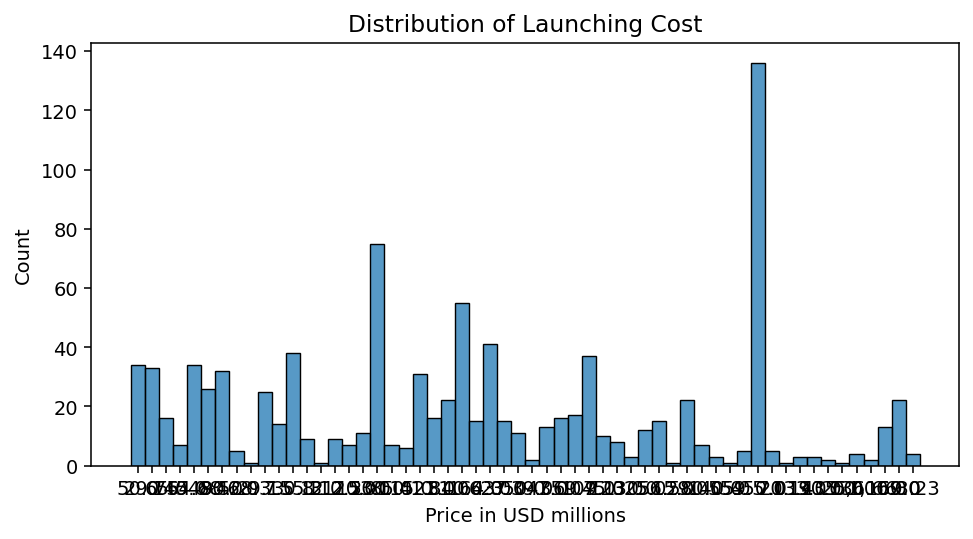

In [ ]:
plt.figure(figsize=(8, 4), dpi=140)

sns.histplot(data=df_data,
             x="Price",
             bins=50)

plt.xlabel("Price in USD millions")
plt.title("Distribution of Launching Cost")
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
df_data.Location.replace({"Shahrud Missile Test Site": "Iran"}, inplace=True, regex=True)
df_data.Location.replace({"Russia": "Russian Federation"}, inplace=True, regex=True)
df_data.Location.replace({"Barents Sea": "Russian Federation"}, inplace=True, regex=True)
df_data.Location.replace({"New Mexico": "USA"}, inplace=True, regex=True)
df_data.Location.replace({"Gran Canaria": "USA"}, inplace=True, regex=True)
df_data.Location.replace({"Pacific Missile Range Facility": "USA"}, inplace=True, regex=True)
df_data.Location.replace({"Yellow Sea": "China"}, inplace=True, regex=True)

In [34]:
indexes = []
for add in df_data.Location:

    if ("New Zealand" in add):
  
        indexes.append(df_data[df_data.Location == add].index.values)

In [35]:
len(indexes)

13

In [36]:
for array in indexes:
    df_data.loc[array, "ISO"] = "NZL"
    df_data.loc[array, "Country"] = "New Zealand"

In [ ]:
ISO_countries = df_data.groupby(by=["ISO", "Country"], as_index=False).agg({"Mission_Status": pd.Series.count})
ISO_countries.rename(columns={"Mission_Status": "Missions"}, inplace=True)

In [ ]:
WORLD_map = px.choropleth(data_frame=ISO_countries, locations="ISO",
                          color="Missions",
                          hover_name="Country",
                          title="Launches by Country",
                          color_continuous_scale="matter")
WORLD_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [37]:
failures = df_data[(df_data.Mission_Status == "Failure") | (df_data.Mission_Status == "Partial Failure") | (df_data.Mission_Status == "Prelaunch Failure")]
FAILS = failures.groupby(by=["ISO", "Country"], as_index=False).agg({"Mission_Status": pd.Series.count})
FAILS.rename(columns={"Mission_Status": "Failures"}, inplace=True)
FAILS

,ISO,Country,Failures
0,CHN,China,7
1,FRA,France,3
2,IND,India,8
3,KAZ,Kazakhstan,3
4,NZL,New Zealand,2
5,RUS,Russian Federation,3
6,USA,United States of America,28


In [ ]:
LOSSES = px.choropleth(data_frame=FAILS, locations="ISO",
                       color="Failures",
                       hover_name="Country",
                       title="Failures by Country",
                       color_continuous_scale="matter")
LOSSES.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [38]:
df_combined = df_data.groupby(by=["Country", "Organisation"], as_index=False).agg({"Mission_Status": pd.Series.count})
df_combined.sort_values(by="Mission_Status", ascending=False, inplace=True)
df_combined.rename(columns={"Mission_Status": "Missions"}, inplace=True)

In [39]:
burst = px.sunburst(data_frame=df_combined, 
                    path=["Country", "Organisation"], 
                    values="Missions",
                    title="Where do Launch Missions Take Place?")
 
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [40]:
df_data.Price = df_data.Price.str.replace(",", "")
df_data.Price = df_data.Price.astype(float)

In [74]:
orgs = df_data.groupby(by="Organisation", as_index=False).agg({"Price": pd.Series.sum})
orgs.sort_values(by="Price", ascending=False, inplace=True)
orgs.rename(columns={"Price": "Total_Cost"}, inplace=True)

In [75]:
h_bar = px.bar(x=orgs.Total_Cost,
               y=orgs.Organisation,
               orientation="h",
               color=orgs.Total_Cost,
               color_continuous_scale="Portland",
               title="Total Spent per Company")
 
h_bar.update_layout(xaxis_title="Total Spent (in millions of $)", 
                    yaxis_title="Organisation",
                    yaxis={"categoryorder": "total ascending"},
                    coloraxis_showscale = False)
h_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
launch_spend = df_data.groupby(by=["Organisation", "Mission_Status", "Price"], as_index=False).agg({"Date": pd.Series.nunique})

In [ ]:
launch_spend.head()

,Organisation,Mission_Status,Price,Date
0,Arianespace,Failure,37.00,1
1,Arianespace,Failure,200.00,1
2,Arianespace,Partial Failure,200.00,1
3,Arianespace,Success,37.00,13
4,Arianespace,Success,48.50,2


# Chart the Number of Launches per Year

In [43]:
dates = pd.to_datetime(arg=df_data.Date)
year = [date.year for date in dates]

In [45]:
df_data["Year"] = year

In [46]:
df_data.sample(n=5)

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country,Year
512,512,512,ULA,"SLC-37B, Cape Canaveral AFS, Florida, USA","Wed Mar 25, 2015 18:36 UTC","Delta IV Medium+ (4,2) | GPS IIF-9",StatusRetired,164.00,Success,USA,United States of America,2015
357,357,357,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Thu May 04, 2017 21:50 UTC","Ariane 5 ECA | Koreasat 7, SGDC-1",StatusActive,200.00,Success,FRA,France,2017
329,329,329,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Fri Aug 18, 2017 12:29 UTC",Atlas V 401 | TDRS-M (TDRS-13),StatusActive,109.00,Success,USA,United States of America,2017
946,946,946,Northrop,"SLC-8, Vandenberg AFB, California, USA","Thu Sep 22, 2005 19:24 UTC",Minotaur I | Streak (STP-R1),StatusActive,40.00,Success,USA,United States of America,2005
747,747,747,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Thu Oct 29, 2009 20:00 UTC",Ariane 5 ECA | NSS-12 & Thor-6,StatusActive,200.00,Success,FRA,France,2009


In [47]:
launch_per_year = df_data.groupby(by="Year", as_index=False).agg({"Mission_Status": pd.Series.count})
launch_per_year.rename(columns={"Mission_Status": "Launch"}, inplace=True)

In [48]:
launch_per_year.head(3)

,Year,Launch
0,1964,2
1,1965,2
2,1966,3


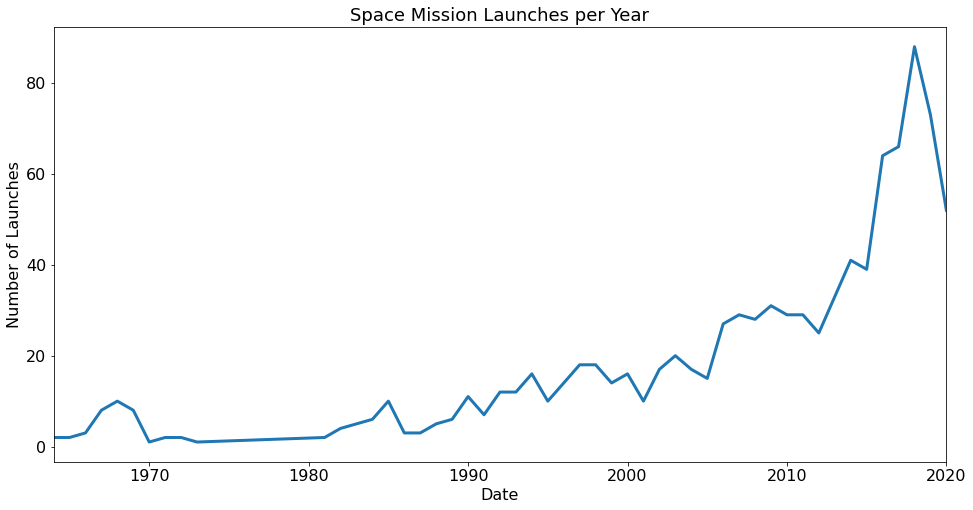

In [ ]:
plt.figure(figsize=(16, 8))
plt.title("Space Mission Launches per Year", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Number of Launches", fontsize=16)
plt.xlim(launch_per_year.Year.min(), launch_per_year.Year.max())

plt.plot(launch_per_year.Year, launch_per_year.Launch, linewidth=3)

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [49]:
month = [date.strftime("%Y-%m") for date in dates]
df_data["Month"] = month

In [50]:
df_data.Month = pd.to_datetime(arg=df_data.Month)
type(df_data.Month[344])

pandas._libs.tslibs.timestamps.Timestamp

In [51]:
df_data = df_data.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)

In [52]:
monthly_launches = df_data.groupby(by="Month", as_index=False).agg({"Mission_Status": pd.Series.count})
monthly_launches.rename(columns={"Mission_Status": "Launch"}, inplace=True)

In [53]:
monthly_launches.head()

,Month,Launch
0,1964-09-01,1
1,1964-12-01,1
2,1965-02-01,1
3,1965-05-01,1
4,1966-07-01,1


In [ ]:
roll_df = monthly_launches.set_index(keys="Month").rolling(window=6).mean()
roll_df.tail()

,Launch
Month,
2020-04-01,6.83
2020-05-01,6.67
2020-06-01,6.33
2020-07-01,7.17
2020-08-01,6.17


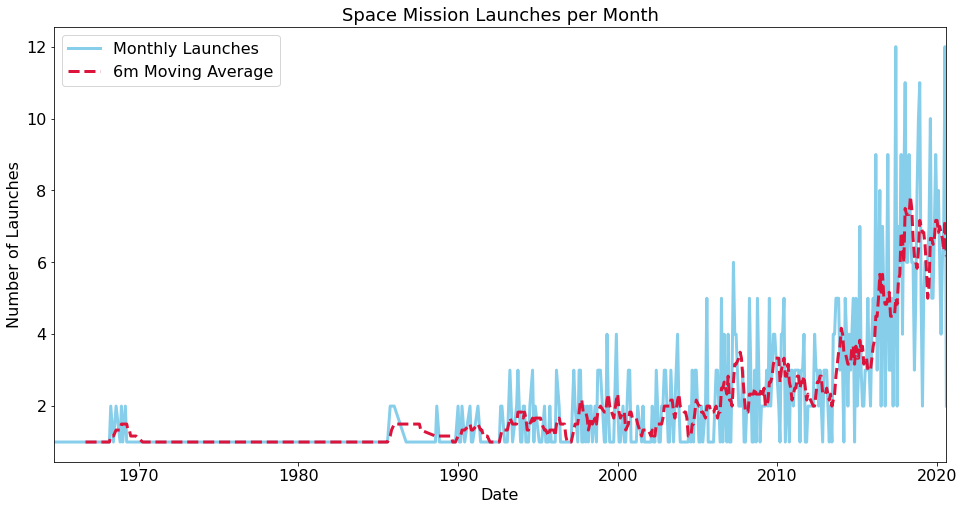

In [ ]:
plt.figure(figsize=(16, 8))
plt.title("Space Mission Launches per Month", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Number of Launches", fontsize=16)
plt.xlim(monthly_launches.Month.min(), monthly_launches.Month.max())

plt.plot(monthly_launches.Month, 
         monthly_launches.Launch,
         color="skyblue", 
         linestyle="-", 
         linewidth=3,
         label="Monthly Launches")

plt.plot(roll_df.index, 
         roll_df.Launch, 
         color="crimson", 
         linestyle="--", 
         linewidth=3,
         label="6m Moving Average")

plt.legend(fontsize=16)
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
monthly_launches.sort_values(by="Launch", ascending=False, inplace=True)

In [ ]:
# December seems to be the best time of the year for space missions

In [ ]:
monthly_launches[:15]

,Month,Launch
386,2020-07-01,12
349,2017-06-01,12
356,2018-01-01,11
367,2018-12-01,11
375,2019-08-01,10
366,2018-11-01,10
334,2016-03-01,9
343,2016-12-01,9
353,2017-10-01,9
359,2018-04-01,9


In [ ]:
monthly_launches[-20:]

,Month,Launch
5,1966-09-01,1
12,1967-10-01,1
53,1985-04-01,1
11,1967-09-01,1
10,1967-08-01,1
9,1967-06-01,1
8,1967-04-01,1
7,1967-02-01,1
6,1966-12-01,1
4,1966-07-01,1


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [ ]:
avg_price = df_data.groupby(by="Year", as_index=False).agg({"Price": pd.Series.mean})
avg_price.tail()

,Year,Price
45,2016,79.46
46,2017,69.49
47,2018,64.75
48,2019,59.61
49,2020,56.65


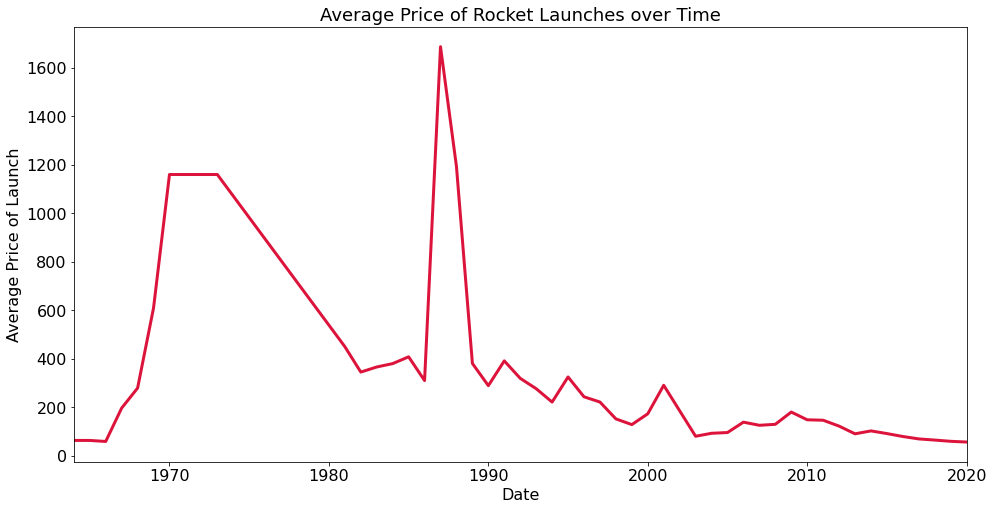

In [ ]:
plt.figure(figsize=(16, 8))
plt.title("Average Price of Rocket Launches over Time", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Average Price of Launch", fontsize=16)
plt.xlim(avg_price.Year.min(), avg_price.Year.max())

plt.plot(avg_price.Year, avg_price.Price, linewidth=3, color="crimson")
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:
top10 = df_data.groupby(by=["Organisation", "Year"], as_index=False).agg({"Mission_Status": pd.Series.count})
top10.rename(columns={"Mission_Status": "Missions"}, inplace=True)

In [ ]:
df = top10.groupby(by="Organisation", as_index=False).agg({"Missions": pd.Series.sum})
df.rename(columns={"Missions": "Total Missions"}, inplace=True)

In [ ]:
merged_df = pd.merge(top10, df, on="Organisation")

In [ ]:
merged_df.sort_values(by="Total Missions", ascending=False, inplace=True)

In [ ]:
top10_orgs = merged_df[:201]
top10_orgs.tail()

,Organisation,Year,Missions,Total Missions
250,US Air Force,1968,8,26
251,US Air Force,1969,4,26
248,US Air Force,1966,3,26
246,US Air Force,1964,2,26
247,US Air Force,1965,2,26


In [ ]:
top10_orgs.drop(["Total Missions"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# create a series that has the cumulative sum for the number of missions launched
cumulative_launches = top10_orgs.groupby(by=["Organisation", "Year"]).sum().groupby(level=[0]).cumsum()
cumulative_launches.reset_index(inplace=True)

In [ ]:
cumulative_launches.head(10)

,Organisation,Year,Missions
0,Arianespace,2002,1
1,Arianespace,2004,4
2,Arianespace,2005,6
3,Arianespace,2006,11
4,Arianespace,2007,15
5,Arianespace,2008,20
6,Arianespace,2009,26
7,Arianespace,2010,32
8,Arianespace,2011,37
9,Arianespace,2012,44


In [ ]:
l_chart = px.line(data_frame=cumulative_launches,
                  x="Year", 
                  y="Missions",
                  color="Organisation",
                  hover_name="Organisation",
                  title="Number of Launches over Time by the Top 10 Organisations")
 
l_chart.update_layout(xaxis_title="Year",
                      yaxis_title="Number of Missions")

l_chart.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [54]:
cold_war = df_data[df_data.Year <= 1991]

In [55]:
len(cold_war)

101

In [56]:
cold_war[cold_war.Country == "Russian Federation"]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country,Year,Month


In [57]:
cold_war[cold_war.Country == "Kazakhstan"]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country,Year,Month
1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan","Tue Nov 15, 1988 03:00 UTC",Energiya/Buran | Buran,StatusRetired,"5,000.00",Success,KAZ,Kazakhstan,1988,1988-11-01
2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.00",Success,KAZ,Kazakhstan,1987,1987-05-01


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [58]:
comp = cold_war[(cold_war.ISO == "KAZ") | (cold_war.ISO == "USA")]

In [59]:
df_war = comp.groupby("Country", as_index=False).agg({"Mission_Status": pd.Series.count})
df_war.rename(columns={"Mission_Status": "Missions"}, inplace=True)
df_war

,Country,Missions
0,Kazakhstan,2
1,United States of America,90


In [ ]:
fig = px.pie(labels=df_war.Country,
             values=df_war.Missions,
             title="Total Launches of the USSR vs USA",
             names=df_war.Country)

fig.update_traces(textposition="inside", textinfo="percent", textfont_size=15)
 
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [60]:
comp_ussr = cold_war[cold_war.ISO == "KAZ"]
ussr_launch = comp_ussr.groupby(["Country", "Year"], as_index=False).agg({"Mission_Status": pd.Series.count})
ussr_launch.rename(columns={"Mission_Status": "Missions"}, inplace=True)

In [61]:
comp_usa = cold_war[cold_war.ISO == "USA"]
usa_launch = comp_usa.groupby(["Country", "Year"], as_index=False).agg({"Mission_Status": pd.Series.count})
usa_launch.rename(columns={"Mission_Status": "Missions"}, inplace=True)

In [62]:
ussr_launch

,Country,Year,Missions
0,Kazakhstan,1987,1
1,Kazakhstan,1988,1


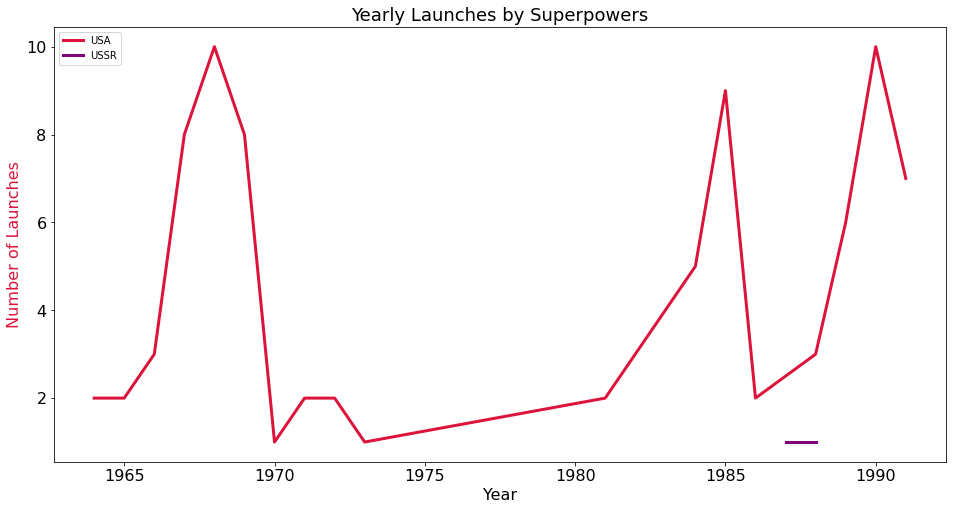

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Yearly Launches by Superpowers", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
 

plt.xlabel("Year", fontsize=16) 
plt.ylabel("Number of Launches", color="crimson", fontsize=16)
 
plt.plot(usa_launch.Year, usa_launch.Missions, color="crimson", linewidth=3,
         label="USA")
plt.plot(ussr_launch.Year, ussr_launch.Missions, color="purple", linewidth=3,
         label="USSR")

plt.legend()
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [64]:
ussr_fail = comp_ussr[(comp_ussr.Mission_Status == "Failure") | 
                      (comp_ussr.Mission_Status == "Partial Failure") | 
                      (comp_ussr.Mission_Status == "Prelaunch Failure")]
ussr_fail

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,ISO,Country,Year,Month


In [63]:
usa_fail = comp_usa[(comp_usa.Mission_Status == "Failure") | 
                    (comp_usa.Mission_Status == "Partial Failure") | 
                    (comp_usa.Mission_Status == "Prelaunch Failure")]
usa_fail = usa_fail.groupby(by=["Year", "Country"], as_index=False).agg({"Mission_Status": pd.Series.count})
usa_fail.rename(columns={"Mission_Status": "Failures"}, inplace=True)
usa_fail

,Year,Country,Failures
0,1964,United States of America,1
1,1967,United States of America,2
2,1968,United States of America,1
3,1986,United States of America,1
4,1990,United States of America,1
5,1991,United States of America,1


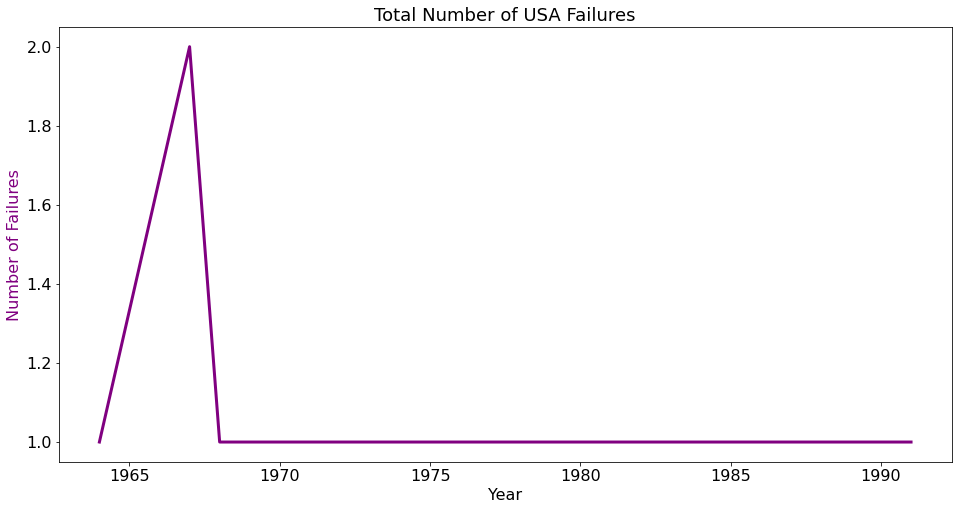

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Total Number of USA Failures", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
 

plt.xlabel("Year", fontsize=16) 
plt.ylabel("Number of Failures", color="Purple", fontsize=16)
 
plt.plot(usa_fail.Year, usa_fail.Failures, color="Purple", linewidth=3)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [65]:
usa_suc = comp_usa[comp_usa.Mission_Status == "Success"]
usa_suc = usa_suc.groupby(by=["Year", "Country"], as_index=False).agg({"Mission_Status": pd.Series.count})
usa_suc.rename(columns={"Mission_Status": "Success"}, inplace=True)

In [66]:
usa_total = comp_usa.groupby(by="Year", as_index=False).agg({"Mission_Status": pd.Series.count})
usa_total.rename(columns={"Mission_Status": "Total_Missions"}, inplace=True)

In [67]:
suc_fail = pd.merge(usa_suc, usa_total, on="Year")

In [68]:
fail_col = suc_fail.Total_Missions - suc_fail.Success
suc_fail["Failure"] = fail_col

In [69]:
percent  = (suc_fail.Failure / suc_fail.Total_Missions) * 100
appr_pct = round(number=percent, ndigits=2)
suc_fail["pct_fail"] = appr_pct

In [70]:
suc_fail

,Year,Country,Success,Total_Missions,Failure,pct_fail
0,1964,United States of America,1,2,1,50.00
1,1965,United States of America,2,2,0,0.00
2,1966,United States of America,3,3,0,0.00
3,1967,United States of America,6,8,2,25.00
4,1968,United States of America,9,10,1,10.00
5,1969,United States of America,8,8,0,0.00
6,1970,United States of America,1,1,0,0.00
7,1971,United States of America,2,2,0,0.00
8,1972,United States of America,2,2,0,0.00
9,1973,United States of America,1,1,0,0.00


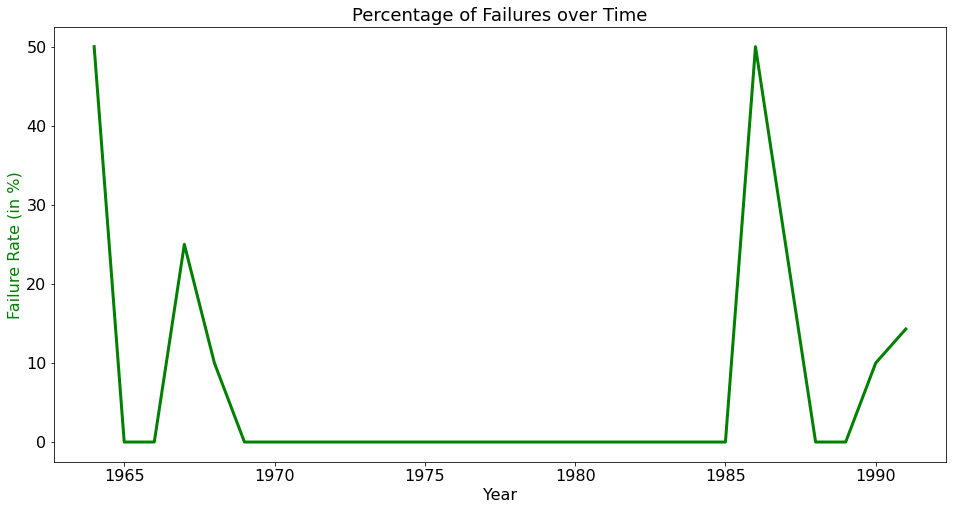

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Percentage of Failures over Time", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
 

plt.xlabel("Year", fontsize=16) 
plt.ylabel("Failure Rate (in %)", color="Green", fontsize=16)
 
plt.plot(suc_fail.Year, suc_fail.pct_fail, color="Green", linewidth=3)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [ ]:
launchers = df_data.groupby(by=["Year", "Country"], as_index=False).agg({"Mission_Status": pd.Series.count})
launchers.rename(columns={"Mission_Status": "Total_Missions"}, inplace=True)

top_launchers = launchers.groupby(by="Year", as_index=False).agg({"Total_Missions": pd.Series.max})
top_launchers.rename(columns={"Total_Missions": "Maximum_Missions"}, inplace=True)

lead_con = []
for (index, row) in top_launchers.iterrows():

    name = launchers[(launchers.Total_Missions == row[1]) & 
                     (launchers.Year == row[0])].Country.values[0]
    lead_con.append(name)

In [ ]:
top_launchers["Country"] = lead_con
top_launchers

,Year,Maximum_Missions,Country
0,1964,2,United States of America
1,1965,2,United States of America
2,1966,3,United States of America
3,1967,8,United States of America
4,1968,10,United States of America
5,1969,8,United States of America
6,1970,1,United States of America
7,1971,2,United States of America
8,1972,2,United States of America
9,1973,1,United States of America


In [72]:
launch_suc = df_data[df_data.Mission_Status == "Success"]

suc_launchers = launch_suc.groupby(by=["Year", "Country"], as_index=False).agg({"Mission_Status": pd.Series.count})

top_success = suc_launchers.groupby(by="Year", as_index=False).agg({"Mission_Status": pd.Series.max})
top_success.rename(columns={"Mission_Status": "Successful_Missions"}, inplace=True)

suc_con = []
for (index, row) in top_success.iterrows():

    name = suc_launchers[(suc_launchers.Mission_Status == row[1]) & 
                         (suc_launchers.Year == row[0])].Country.values[0]
    suc_con.append(name)

In [73]:
top_success["Country"] = suc_con
top_success

,Year,Successful_Missions,Country
0,1964,1,United States of America
1,1965,2,United States of America
2,1966,3,United States of America
3,1967,6,United States of America
4,1968,9,United States of America
5,1969,8,United States of America
6,1970,1,United States of America
7,1971,2,United States of America
8,1972,2,United States of America
9,1973,1,United States of America


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [ ]:
org_launch = df_data.groupby(by=["Year", "Organisation"], as_index=False).agg({"Mission_Status": pd.Series.count})
org_launch.rename(columns={"Mission_Status": "Total_Launches"}, inplace=True)

top_org = org_launch.groupby(by="Year", as_index=False).agg({"Total_Launches": pd.Series.max})
top_org.rename(columns={"Total_Launches": "Maximum_Missions"}, inplace=True)

lead_org = []
for (index, row) in top_org.iterrows():

    org_name = org_launch[(org_launch.Total_Launches == row[1]) & 
                      (org_launch.Year == row[0])].Organisation.values[0]
    lead_org.append(org_name)

In [ ]:
top_org["Organisation"] = lead_org
top_org

,Year,Maximum_Missions,Organisation
0,1964,2,US Air Force
1,1965,2,US Air Force
2,1966,3,US Air Force
3,1967,7,US Air Force
4,1968,8,US Air Force
5,1969,4,NASA
6,1970,1,NASA
7,1971,2,NASA
8,1972,2,NASA
9,1973,1,NASA


In [ ]:
# create a series that has the cumulative sum for the number of missions launched
cumulative_launches = top_org.groupby(by=["Organisation", "Year"]).sum().groupby(level=[0]).cumsum()
cumulative_launches.reset_index(inplace=True)

In [ ]:
cumulative_launches.head()

,Organisation,Year,Maximum_Missions
0,Arianespace,2006,5
1,CASC,1987,2
2,CASC,2003,7
3,CASC,2004,15
4,CASC,2005,18


In [ ]:
l_chart = px.line(data_frame=cumulative_launches,
                  x="Year", 
                  y="Maximum_Missions",
                  color="Organisation",
                  hover_name="Organisation",
                  title="Most Number of Launches by Organisations")
 
l_chart.update_layout(xaxis_title="Year",
                      yaxis_title="Number of Missions")

l_chart.show()